In [122]:
import pandas as pd
from twython import Twython
import tweepy
from tweepy import OAuthHandler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [98]:
df1 = pd.read_csv('CrisisLexT6/2012_Sandy_Hurricane/2012_Sandy_Hurricane-ontopic_offtopic.csv')
df2 = pd.read_csv('CrisisLexT6/2013_Oklahoma_Tornado/2013_Oklahoma_Tornado-ontopic_offtopic.csv')

In [99]:
df1.head()

,tweet id,tweet,label
0,'262596552399396864',I've got enough candles to supply a Mexican fa...,off-topic
1,'263044104500420609',Sandy be soooo mad that she be shattering our ...,on-topic
2,'263309629973491712',@ibexgirl thankfully Hurricane Waugh played it...,off-topic
3,'263422851133079552',@taos you never got that magnificent case of B...,off-topic
4,'262404311223504896',"I'm at Mad River Bar &amp; Grille (New York, N...",off-topic


In [100]:
df1.shape

(10008, 3)

In [101]:
df1['tweet id'] = df1['tweet id'].str.strip('\'')
df1['tweet id'] = df1['tweet id'].astype(int)

In [102]:
df1.head()

,tweet id,tweet,label
0,262596552399396864,I've got enough candles to supply a Mexican fa...,off-topic
1,263044104500420609,Sandy be soooo mad that she be shattering our ...,on-topic
2,263309629973491712,@ibexgirl thankfully Hurricane Waugh played it...,off-topic
3,263422851133079552,@taos you never got that magnificent case of B...,off-topic
4,262404311223504896,"I'm at Mad River Bar &amp; Grille (New York, N...",off-topic


In [103]:
df1.dtypes

tweet id     int64
 tweet      object
 label      object
dtype: object

In [ ]:
df1['tweet']

In [114]:
df1.rename(columns=lambda x: x.strip(), inplace=True)

In [115]:
df1.columns

Index(['tweet id', 'tweet', 'label'], dtype='object')

In [116]:
df1.describe(include='object')

,tweet,label
count,10008,10008
unique,9431,2
top,"RT @HurricaneSandyw: FOR EVERY 100 RETWEETS, W...",on-topic
freq,28,6138


In [119]:
df1.drop_duplicates(['tweet'], inplace=True)
df1.describe(include = 'object')

,tweet,label
count,9431,9431
unique,9431,2
top,Well that was an easy 13 points #Giants,on-topic
freq,1,5579


In [128]:
df1.isnull().sum()

tweet id    0
tweet       0
label       0
dtype: int64

In [121]:
df1['label'] = df1['label'].rename(columns={'off_topic': 0,
                                         'on_topic': 1})

In [123]:
X = df1['tweet']
y = df1['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cvec = CountVectorizer(ngram_range = (1,2),
                       stop_words = 'english')
X_train = cvec.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())
X_train_df

,00,00 00,00 59,00 est,00 gmt,00 humidity,00 ing,00 packing,00 pm,00 year,...,zxnhdkzl,zxntguka,zyhwl7lf,zyhwl7lf youtube,zz5vp7zr,zz5vp7zr hurry,zzcr2jei,zzlxukbm,zzvftd8r,zzxgabhw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


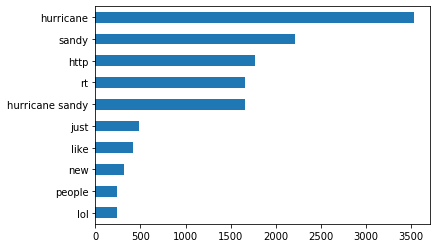

In [127]:
X_train_df.sum().sort_values(ascending = False).head(50) 

top_words = (X_train_df.sum().sort_values(ascending = False).head(10))
top_words.sort_values(ascending=True).plot(kind='barh')

In [64]:
API_KEY = 'Otw4YA2AuYOmNC90quRrM8x6r'
API_SECRET = 'tX1fmbcqAnFMrfDUhhy1NJ7Ebpk2VZHcQaNIeMrqzY93WLWx67'
ACCESS_TOKEN = '2907044139-u4Lld6boO1116IROW3Dzm3vIPkLA5jtUwmCJEOL'
ACCESS_SECRET = 'NQEc0EZKAzWJIYhovm3LU5yEDL7H8GyX3rrIWA2JkA5wW'
tweet = Twython(app_key=API_KEY, app_secret=API_SECRET, oauth_token=ACCESS_TOKEN, oauth_token_secret=ACCESS_SECRET)
auth = OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth)

In [72]:
api.update_status("Tweeting from Python")

Status(_api=<tweepy.api.API object at 0x11ca1af90>, _json={'created_at': 'Wed Mar 04 22:06:41 +0000 2020', 'id': 1235325820949991429, 'id_str': '1235325820949991429', 'text': 'Tweeting from Python', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://disasterwarning.com" rel="nofollow">disaster_warning</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2907044139, 'id_str': '2907044139', 'name': 'EliahNebb', 'screen_name': 'EliahNebb', 'location': '', 'description': "I'm the guy who sings the chorus.", 'url': None, 'entities': {'description': {'urls': []}}, 'protected': True, 'followers_count': 25, 'friends_count': 357, 'listed_count': 0, 'created_at': 'Sat Dec 06 00:31:41 +0000 2014', 'favourites_count': 8605, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': F

In [73]:
search_words = "#wildfires"
date_since = "2018-11-16"

In [ ]:
#for tweet in tweepy.Cursor(api.search,q=relevant_words,count=100,
                          # geocode="40.909,-73.8891,0.5mi",
                          # lang="en",
                          # since="2019-07-31").items():

In [88]:
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)
tweets
# tweet.text for tweet in tweets
users_locs = [[tweet.user.location, tweet.created_at, tweet.text] for tweet in tweets]
users_locs

[['Ontario, Canada',
  datetime.datetime(2020, 3, 4, 22, 9, 3),
  'Bushplane Museum HOCKEY! Traveling Exhibition by Canadian Museum of History #Hockey in Canada #Canadian Bushplane H… https://t.co/Fx4MGoRTe5'],
 ['Muncie, IN',
  datetime.datetime(2020, 3, 4, 22, 5, 3),
  'According to the Bloomberg Green, Australia’s fires emitted 409,700,000 metric tons of CO2. What was the environmen… https://t.co/rX1PvH0D4S'],
 ['United States',
  datetime.datetime(2020, 3, 4, 21, 25, 1),
  'I  co-authored a #story on #PFAS #toxicchemicals this #update is #fabulous #cancer #turnoutgear #fire #firefighters… https://t.co/NNrVaQdUrr'],
 ['Calgary',
  datetime.datetime(2020, 3, 4, 21, 10, 6),
  "Hotter climate upped risk of Australia's record fires by 30 per cent\nhttps://t.co/5iy6K7HXQK\n#Australia #wildfires… https://t.co/N5YQTyqgBG"],
 ['Smyrna, GA',
  datetime.datetime(2020, 3, 4, 20, 53, 27),
  'My 3rd Graders learned about #Australia as well as @brainpop #Wildfires, animal endangerment, indigenous

In [90]:
data = pd.DataFrame(users_locs, columns=['location', 'time', 'text'])
data.head()

,location,time,text
0,"Ontario, Canada",2020-03-04 22:09:03,Bushplane Museum HOCKEY! Traveling Exhibition ...
1,"Muncie, IN",2020-03-04 22:05:03,"According to the Bloomberg Green, Australia’s ..."
2,United States,2020-03-04 21:25:01,I co-authored a #story on #PFAS #toxicchemica...
3,Calgary,2020-03-04 21:10:06,Hotter climate upped risk of Australia's recor...
4,"Smyrna, GA",2020-03-04 20:53:27,My 3rd Graders learned about #Australia as wel...


In [91]:
data.dtypes

location            object
time        datetime64[ns]
text                object
dtype: object

In [65]:
df1['tweet id'][0]

262596552399396864

In [66]:
tweet.show_status(id='262596552399396864')

TwythonError: Twitter API returned a 403 (Forbidden), Sorry, you are not authorized to see this status.

In [67]:
def tweet_collection(tweet_id):
    json = api.get_status(tweet_id)._json
    tweet = {}
    tweet['id'] = json['id']
    tweet['created_at'] = json['created_at']
    tweet['text'] = json['text']
    #information about user
    tweet['user'] = json['user']
    tweet['user_id'] = json['user']['id']
    tweet['user_name'] = json['user']['name']
    tweet['user_location'] = json['user']['location']
    tweet['user_description'] = json['user']['description']
    tweet['user_followers'] = json['user']['followers_count']
    #tweet info
    tweet['retweet_count'] = json['retweet_count']
    tweet['favorite_count'] = json['favorite_count']
    tweet['lang'] = json['lang']
    tweet['is_quote_status'] = json['is_quote_status']
    #about location if user uses geotags 
    if json['place']!=None:
        tweet['place'] = json['place']
        tweet['place_name'] = json['place']['full_name']
        tweet['place_country'] = json['place']['country_code']
        tweet['coordinates'] = json['place']['bounding_box']['coordinates'][0][0]
        tweet['coordinates_longitude'] = json['place']['bounding_box']['coordinates'][0][0][0]
        tweet['coordinates_latitude'] = json['place']['bounding_box']['coordinates'][0][0][1]
    else:
        tweet['place']= None
        tweet['place_name'] = None 
        tweet['place_country'] = None 
        tweet['coordinates'] = None 
        tweet['coordinates_longitude'] = None 
        tweet['coordinates_latitude'] = None 
    return tweet

In [68]:
tweet_collection(262596552399396864)

TweepError: [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]